In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io as scio
import sharpy.utils.h5utils as h5utils
import h5py
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

# Straight Wing at 0 degree angle of attack

In [3]:
uvlm = scio.loadmat('output/test_pazy_M16N1Ms16_alpha0000_skin1/pazy_uinf0010_alpha0000/savedata/pazy_uinf0010_alpha0000.uvlmss.mat')

In [74]:
path_to_freqresp = './output/test_pazy_M16N1Ms16_alpha0000_skin1/pazy_uinf0010_alpha0000/frequencyresponse/aerodynamic.freqresp.h5'
with h5py.File(path_to_freqresp, 'r') as f:
    uvlm = h5utils.load_h5_in_dict(f)

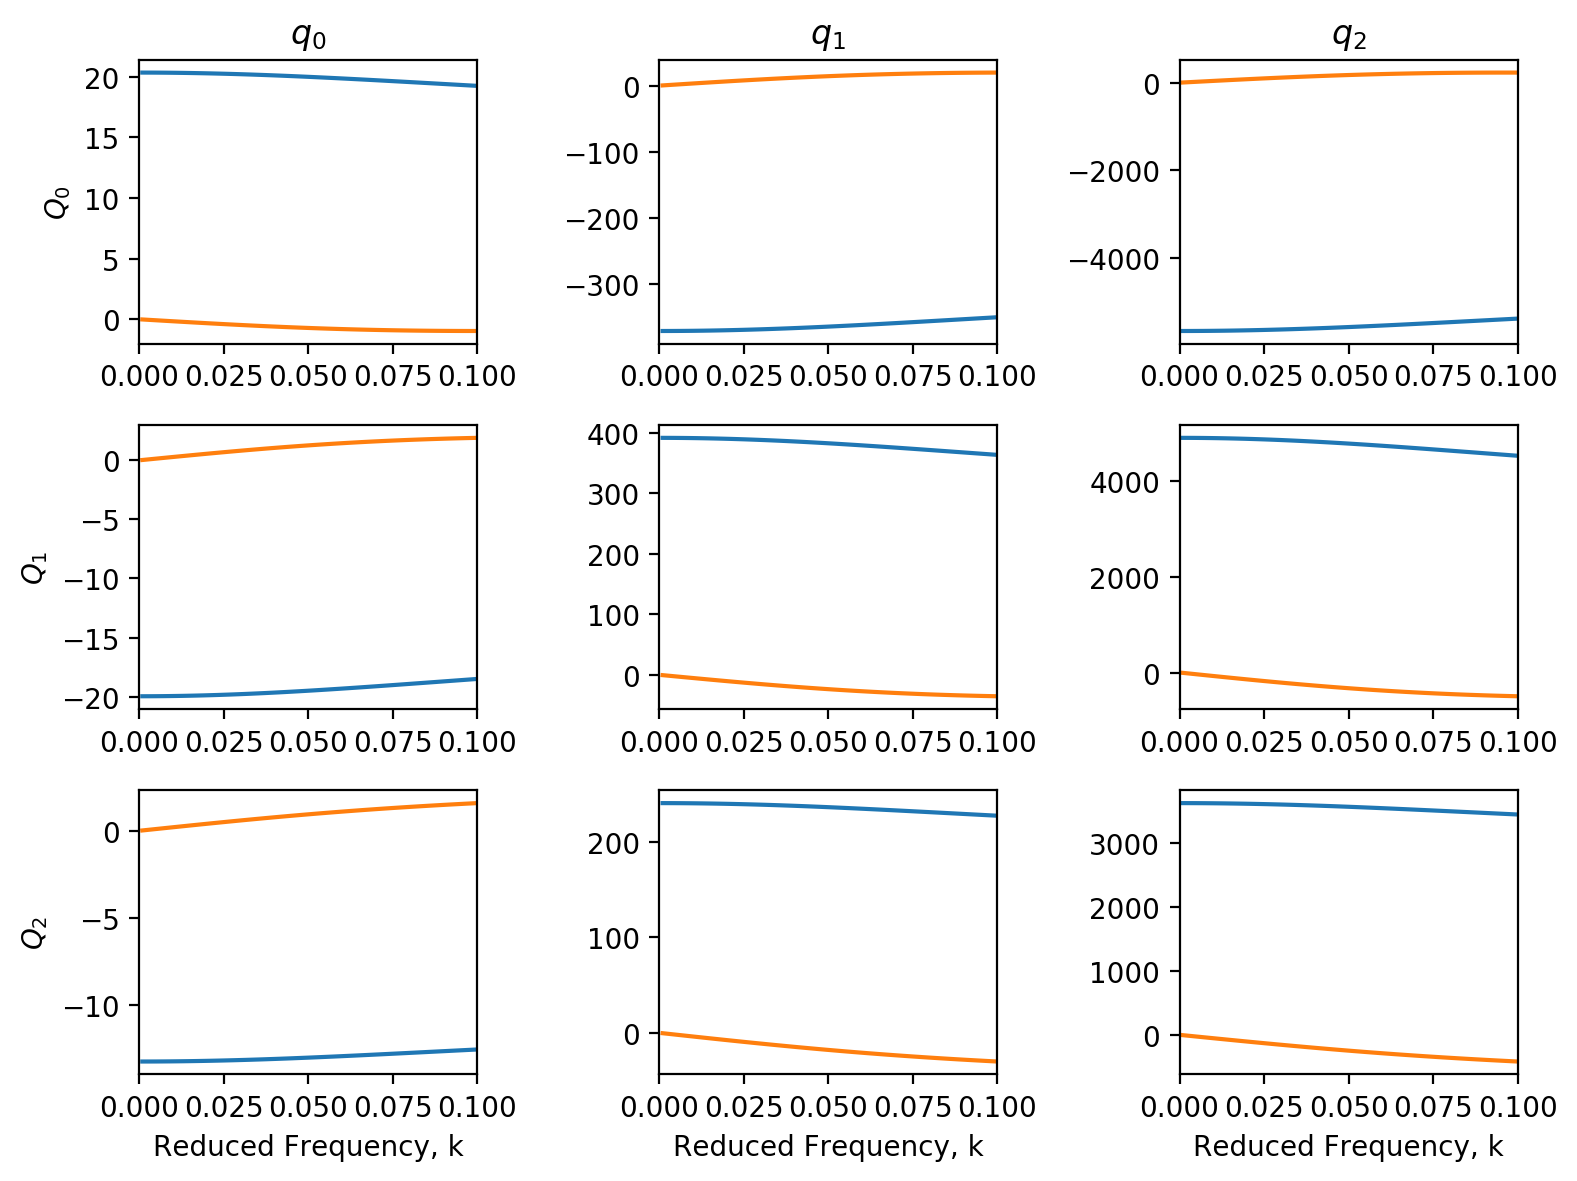

In [76]:
m_list = [0, 1, 2]
p_list = [0, 1, 2]

fig, ax = plt.subplots(nrows=len(p_list), ncols=len(m_list))

for r in range(len(p_list)):
    for c in range(len(m_list)):
        ax[r, c].plot(uvlm['frequency'], uvlm['response'][p_list[r], m_list[c], :].real)
        ax[r, c].plot(uvlm['frequency'], uvlm['response'][p_list[r], m_list[c], :].imag)

        ax[r, c].set_xlim(0, 0.1)
        
        if c == 0:
            ax[r, c].set_ylabel('$Q_%g$'% r)
        if r == 0:
            ax[r, c].set_title('$q_%g$'% c)
        if r == 2:
            ax[r, c].set_xlabel('Reduced Frequency, k')
    
plt.tight_layout()

# Angle of attack = 5

/home/ng213/anaconda3/envs/sharpy_env/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


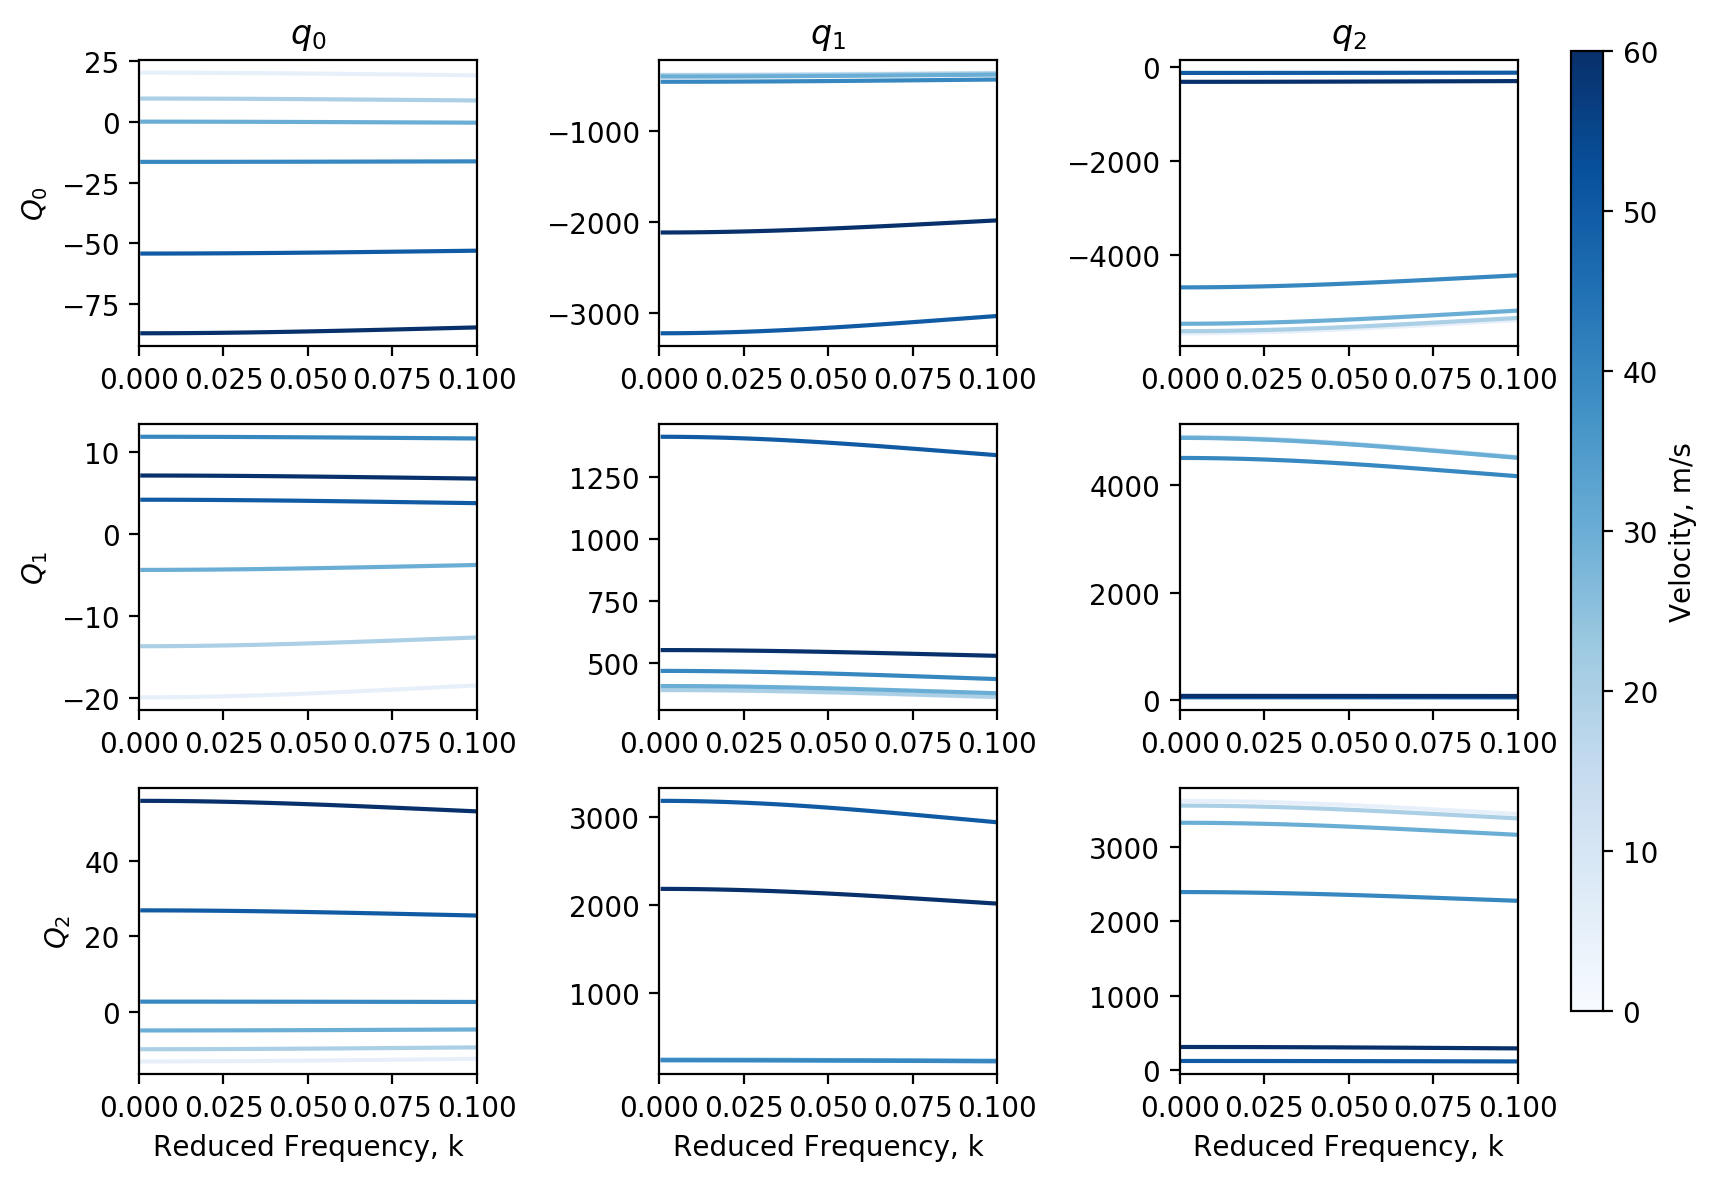

In [102]:
m_list = [0, 1, 2]
p_list = [0, 1, 2]
u_inf_vec = [20, 30, 40, 50, 60]
output_path = './output/postprocess/'
cmap=plt.get_cmap('Blues')
cmap2=plt.get_cmap('Reds')

nrm = plt.Normalize(vmin=0, vmax=60)

fig, ax = plt.subplots(nrows=len(p_list), ncols=len(m_list))

for u_inf in u_inf_vec:
    for r in range(len(p_list)):
        for c in range(len(m_list)):
            yfreq = np.loadtxt(output_path + '/sharpy_uinf{:04g}_aero/in{:02g}_out{:02g}.txt'.format(u_inf, m_list[c], p_list[r]))
            w_to_k = 0.05/u_inf
            
            if u_inf == 20:
                pass
                ax[r, c].plot(uvlm['frequency'], uvlm['response'][p_list[r], m_list[c], :].real, c=cmap(nrm(5)))
#             ax[r, c].plot(uvlm['frequency'], uvlm['response'][p_list[r], m_list[c], :].imag)
            ax[r, c].plot(yfreq[:, 0], yfreq[:, 1], c=cmap(nrm(u_inf)))
#             ax[r, c].plot(yfreq[:, 0], yfreq[:, 2], c=cmap2(nrm(u_inf)))
            
            ax[r, c].set_xlim(0, 0.1)

            if c == 0:
                ax[r, c].set_ylabel('$Q_%g$'% r)
            if r == 0:
                ax[r, c].set_title('$q_%g$'% c)
            if r == 2:
                ax[r, c].set_xlabel('Reduced Frequency, k')
    
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.99, 0.15, 0.02, 0.8])
fig.colorbar(mpl.cm.ScalarMappable(norm=nrm, cmap='Blues'), label='Velocity, m/s', cax=cbar_ax)

plt.tight_layout()
plt.savefig('../figures/UVLM_real.pdf')

/home/ng213/anaconda3/envs/sharpy_env/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


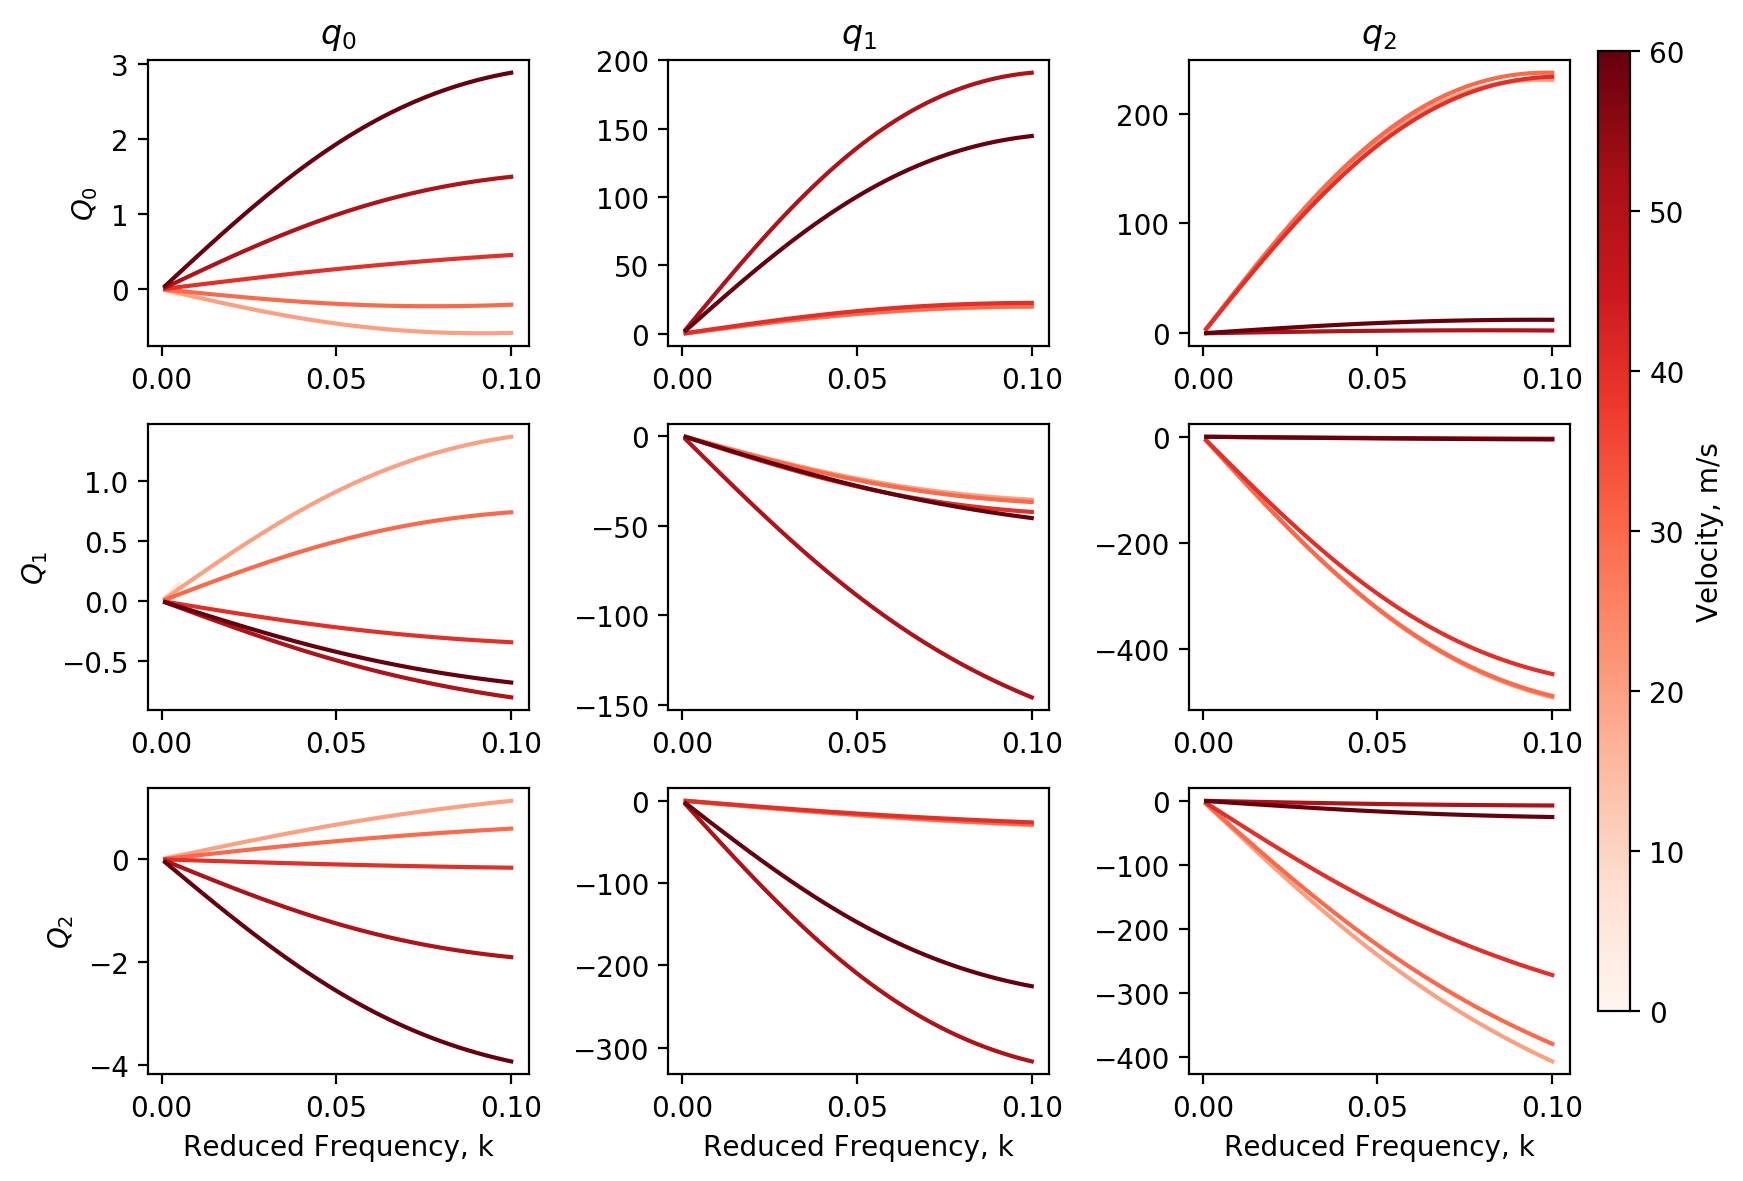

In [104]:
m_list = [0, 1, 2]
p_list = [0, 1, 2]
u_inf_vec = [20, 30, 40, 50, 60]
output_path = './output/postprocess/'
cmap=plt.get_cmap('Blues')
cmap2=plt.get_cmap('Reds')

nrm = plt.Normalize(vmin=0, vmax=60)

fig, ax = plt.subplots(nrows=len(p_list), ncols=len(m_list))

for u_inf in u_inf_vec:
    for r in range(len(p_list)):
        for c in range(len(m_list)):
            yfreq = np.loadtxt(output_path + '/sharpy_uinf{:04g}_aero/in{:02g}_out{:02g}.txt'.format(u_inf, m_list[c], p_list[r]))
            w_to_k = 0.05/u_inf
            
            if u_inf ==20:
                pass
                ax[r, c].plot(uvlm['frequency'][:3], uvlm['response'][p_list[r], m_list[c], :3].imag, c=cmap2(nrm(5)))
#             ax[r, c].plot(uvlm['frequency'], uvlm['response'][p_list[r], m_list[c], :].imag)
#             ax[r, c].plot(yfreq[:, 0], yfreq[:, 1], c=cmap(nrm(u_inf)))
            ax[r, c].plot(yfreq[:, 0], yfreq[:, 2], c=cmap2(nrm(u_inf)))
            
#             ax[r, c].set_xlim(0, 0.1)

            if c == 0:
                ax[r, c].set_ylabel('$Q_%g$'% r)
            if r == 0:
                ax[r, c].set_title('$q_%g$'% c)
            if r == 2:
                ax[r, c].set_xlabel('Reduced Frequency, k')
    
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.99, 0.15, 0.02, 0.8])
fig.colorbar(mpl.cm.ScalarMappable(norm=nrm, cmap='Reds'), label='Velocity, m/s', cax=cbar_ax)

plt.tight_layout()
plt.savefig('../figures/UVLM_imag.pdf')


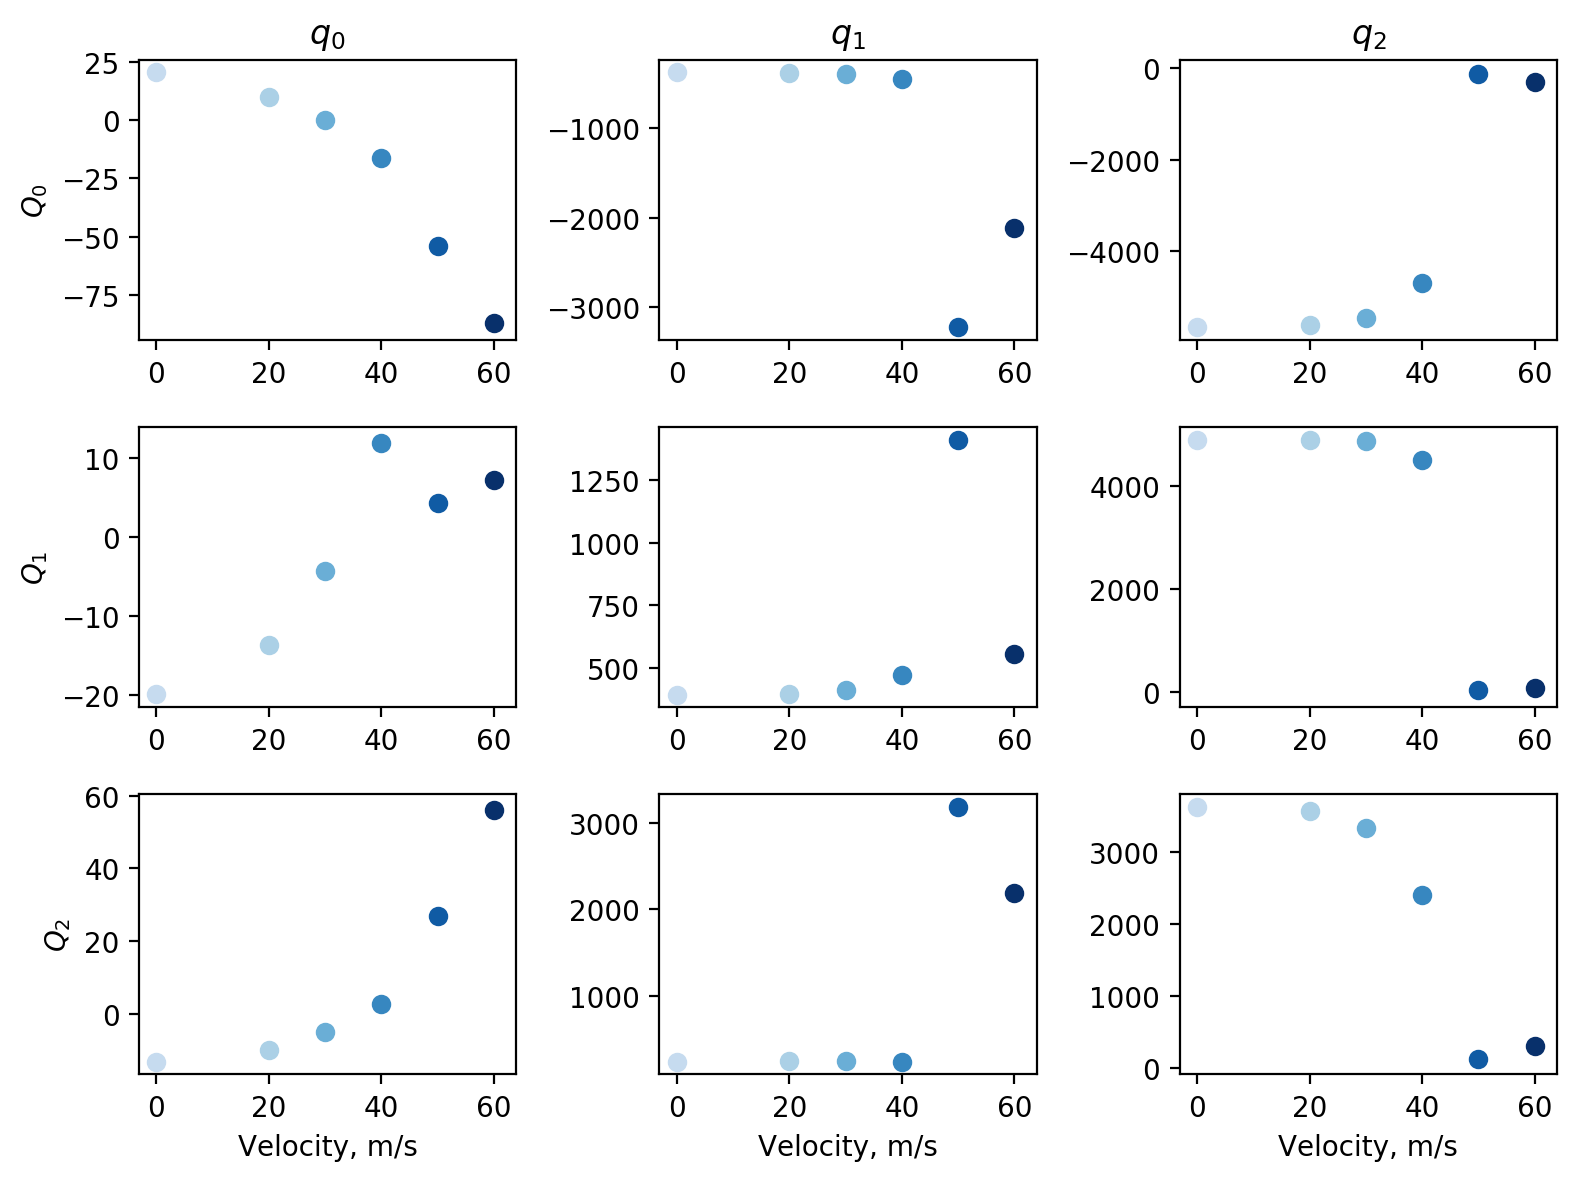

In [88]:
m_list = [0, 1, 2]
p_list = [0, 1, 2]
u_inf_vec = [20, 30, 40, 50, 60]
output_path = './output/postprocess/'
cmap=plt.get_cmap('Blues')
cmap2=plt.get_cmap('Reds')

nrm = plt.Normalize(vmin=0, vmax=60)

fig, ax = plt.subplots(nrows=len(p_list), ncols=len(m_list))

for u_inf in u_inf_vec:
    for r in range(len(p_list)):
        for c in range(len(m_list)):
            yfreq = np.loadtxt(output_path + '/sharpy_uinf{:04g}_aero/in{:02g}_out{:02g}.txt'.format(u_inf, m_list[c], p_list[r]))
            w_to_k = 0.05/u_inf
            
            if u_inf ==20:
                pass
                ax[r, c].scatter(0, uvlm['response'][p_list[r], m_list[c], 0].real, color=cmap(nrm(15)))
#             ax[r, c].plot(uvlm['frequency'], uvlm['response'][p_list[r], m_list[c], :].imag)
            ax[r, c].scatter(u_inf, yfreq[0, 1], color=cmap(nrm(u_inf)))
#             ax[r, c].plot(yfreq[:, 0], yfreq[:, 2], c=cmap2(nrm(u_inf)))
            
#             ax[r, c].set_xlim(0, 0.1)

            if c == 0:
                ax[r, c].set_ylabel('$Q_%g$'% r)
            if r == 0:
                ax[r, c].set_title('$q_%g$'% c)
            if r == 2:
                ax[r, c].set_xlabel('Velocity, m/s')
    
plt.tight_layout()